In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = [18,10]

### Intro to dimensionality reduction

- If a column has zero variance it can be dropped

In [3]:
pokemon_df = pd.read_csv('data/pokemon.csv')
pokemon_df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [4]:
pokemon_df.describe(exclude='number')

,Name,Type 1,Type 2,Legendary
count,800,800,414,800
unique,800,18,18,2
top,Luxio,Water,Flying,False
freq,1,112,97,735


### Why reduce dimensionality?

- Your dataset will:
    - be less complex
    - require less disk space
    - require less computation time
    - have lower chance of model overfitting 

In [5]:
ansur_df_m = pd.read_csv('data/ANSUR_II_MALE.csv')
ansur_df_f = pd.read_csv('data/ANSUR_II_FEMALE.csv')
ansur_df_m['body_height'] = ansur_df_m.stature_m
ansur_df_f['body_height'] = ansur_df_f.stature_m
ansur_df_m['n_legs'] = 2
ansur_df_f['n_legs'] = 2

In [6]:
ansur_df_temp = pd.concat([ansur_df_m.iloc[:100, :],  ansur_df_f.iloc[:100, :]], axis=0)

In [7]:
ansur_df_1 = ansur_df_temp[['Gender', 'weight_kg', 'stature_m', 'body_height']]
ansur_df_2 = ansur_df_temp[['Gender', 'footlength', 'headlength', 'n_legs']]

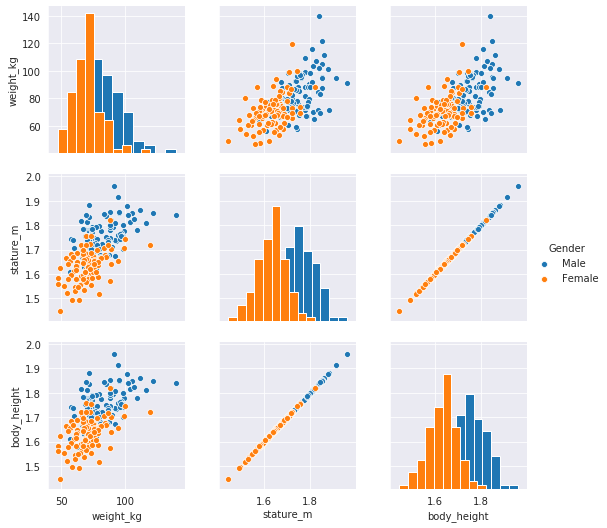

In [8]:
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')
plt.show()

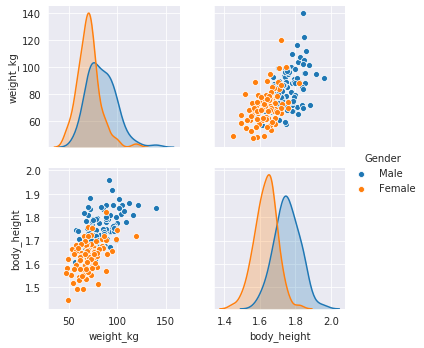

In [9]:
# Remove one of the redundant features
reduced_df = ansur_df_1.drop('stature_m', axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')

# Show the plot
plt.show()

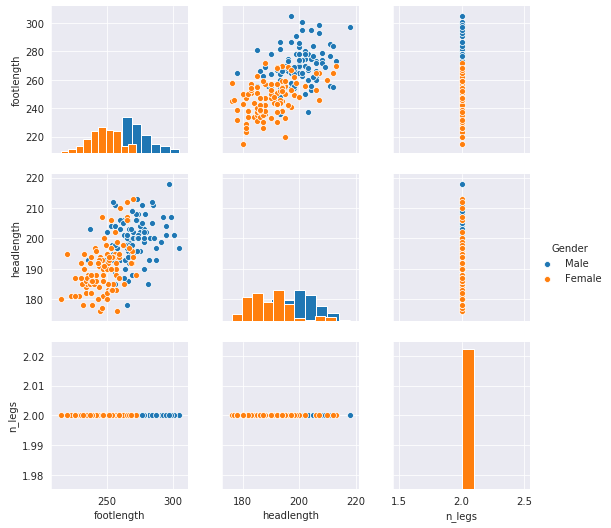

In [10]:
sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist')
plt.show()

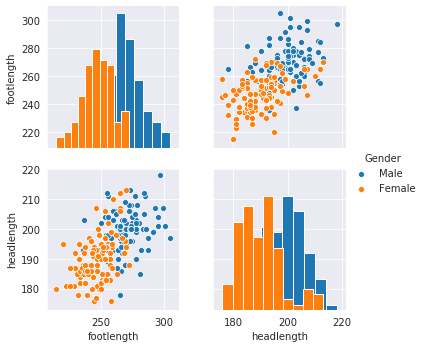

In [11]:
# Remove the redundant feature
reduced_df = ansur_df_2.drop('n_legs', axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

### t-SNE visualization of high-dimensional data
- t-Distributed Stochasitic Neighbor Embedding
- t-SNE on iris dataset

![t-SNE_iris](data/t-SNE_iris.png)

- t-SNE on female ANSUR dataset

In [13]:
df = pd.read_csv('data/ANSUR_II_FEMALE.csv')
df.shape

(1986, 99)

In [14]:
non_numeric = ['BMI_class', 'Height_class', 'Gender', 'Component', 'Branch']

df_numeric = df.drop(non_numeric,axis=1)
df_numeric.shape

(1986, 94)

In [15]:
from sklearn.manifold import TSNE

m = TSNE(learning_rate=50)

In [16]:
tsne_features = m.fit_transform(df_numeric)

tsne_features[1:4, :]

array([[-33.698814,  22.832668],
       [-15.614825,  30.357212],
       [ 16.381071,  22.361715]], dtype=float32)

In [17]:
df['x'] = tsne_features[:,0]
df['y'] = tsne_features[:,1]

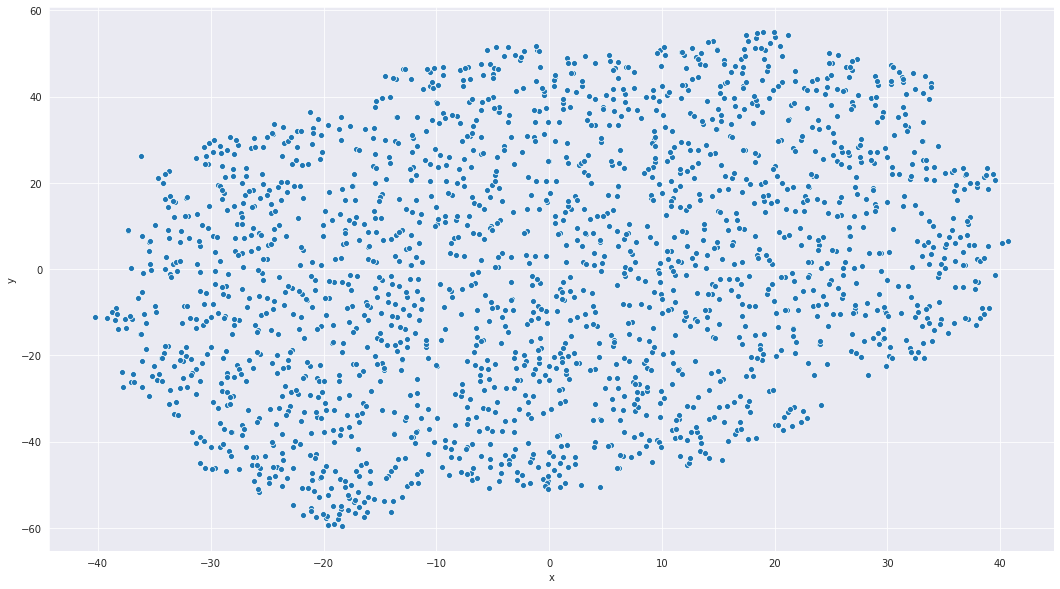

In [18]:
sns.scatterplot(x='x', y='y', data=df)
plt.show()

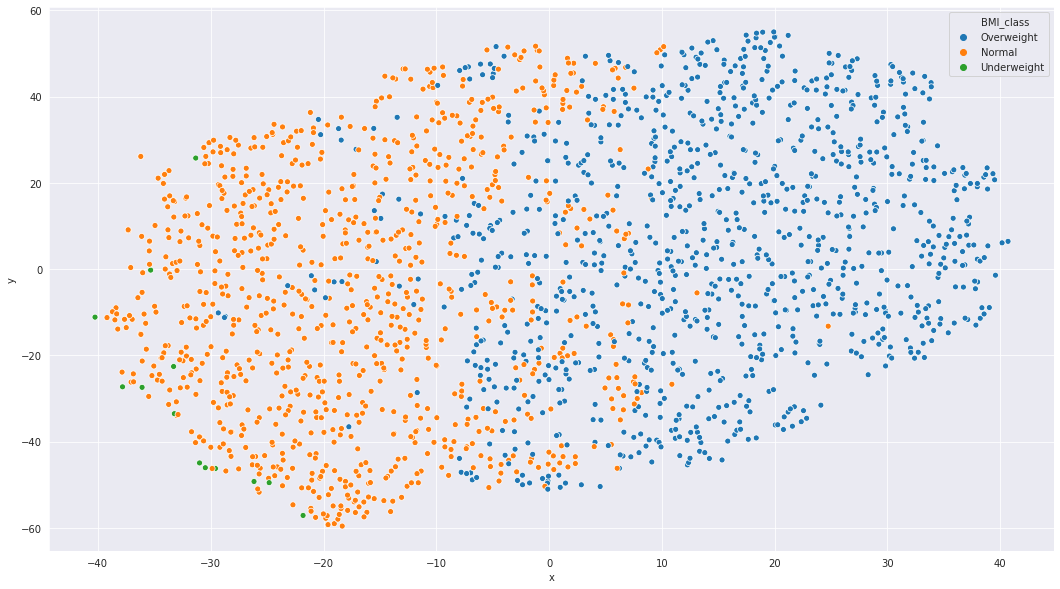

In [19]:
sns.scatterplot(x='x', y='y', hue='BMI_class', data=df)
plt.show()

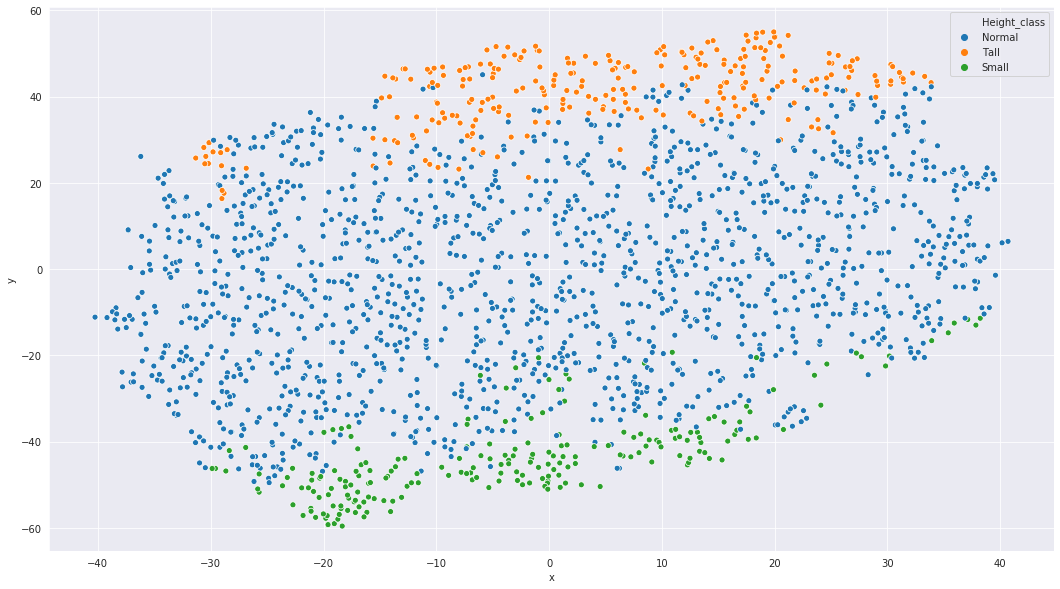

In [20]:
sns.scatterplot(x='x', y='y', hue='Height_class', data=df)
plt.show()

In [22]:
df_m = pd.read_csv('data/ANSUR_II_MALE.csv')
df_f = pd.read_csv('data/ANSUR_II_FEMALE.csv')
df = pd.concat([df_m,df_f], axis=0)
df.shape

(6068, 99)

In [23]:
df = df[['Branch', 'Component', 'Gender', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference',
       'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight',
       'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength',
       'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength', 'heelanklecircumference', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting',
       'iliocristaleheight', 'interpupillarybreadth', 'interscyei', 'interscyeii', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight', 'lateralmalleolusheight',
       'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference', 'neckcircumferencebase', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength',
       'shouldercircumference', 'shoulderelbowlength', 'shoulderlength', 'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span', 'suprasternaleheight', 'tenthribheight',
       'thighcircumference', 'thighclearance', 'thumbtipreach', 'tibialheight', 'tragiontopofhead', 'trochanterionheight', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth',
       'waistcircumference', 'waistdepth', 'waistfrontlengthsitting', 'waistheightomphalion', 'wristcircumference', 'wristheight']]

In [24]:
df.shape

(6068, 94)

In [26]:
# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component']

# Drop the non-numerical columns from df
df_numeric = df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

(6068, 2)


In [27]:
df['x'] = tsne_features[:, 0]
df['y'] = tsne_features[:, 1]

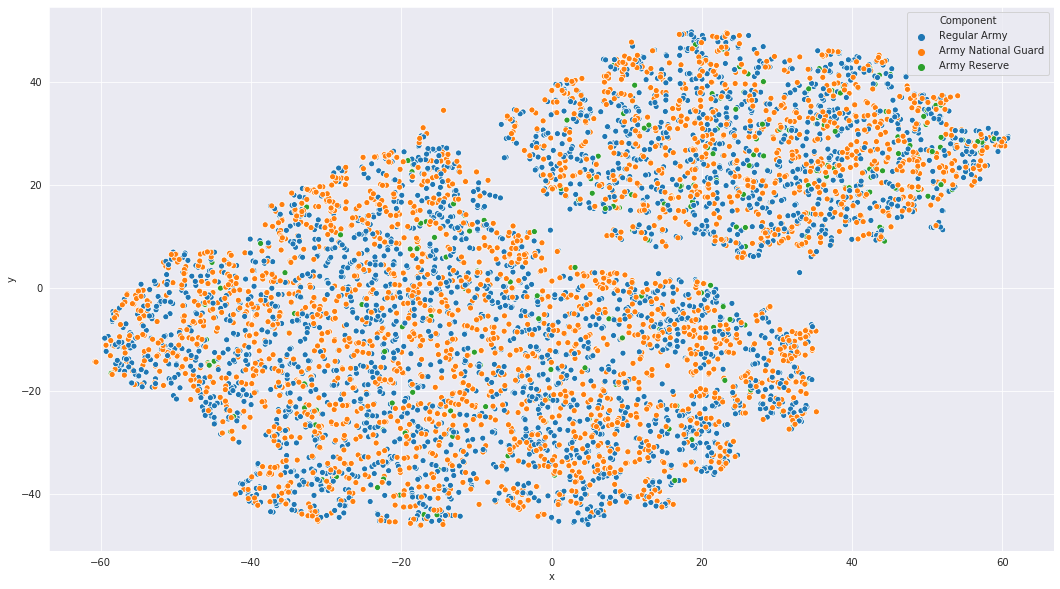

In [28]:
# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue='Component', data=df)

# Show the plot
plt.show()

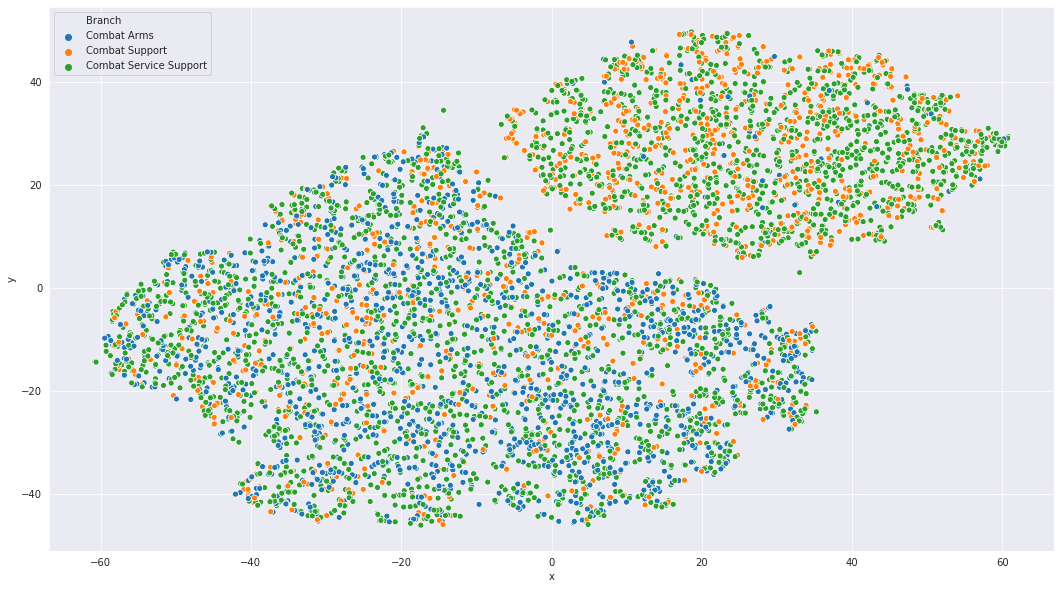

In [29]:
# Color the points by Army Branch
sns.scatterplot(x="x", y="y", hue='Branch', data=df)

# Show the plot
plt.show()

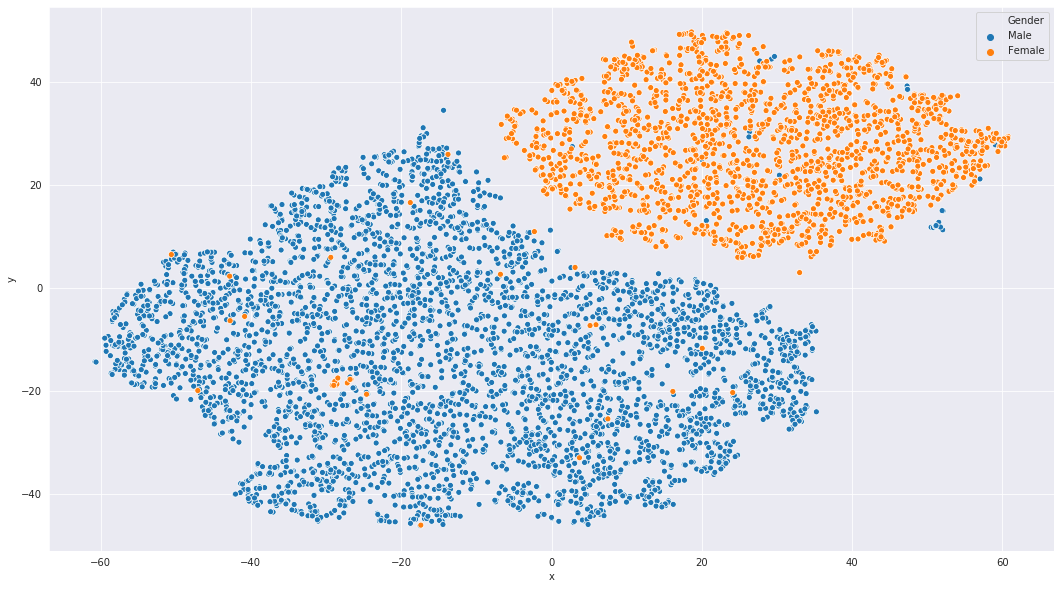

In [30]:
# Color the points by Gender
sns.scatterplot(x="x", y="y", hue='Gender', data=df)

# Show the plot
plt.show()